<a href="https://colab.research.google.com/github/polortiz4/ComputerVision/blob/master/hw5/homework05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Student Names and IDs**:
>
> - Pablo Ortiz, 0686443
> - Jongwan Park, 0848815

# Homework 5

## Homework Submission Workflow

When you submit your work, follow the instructions on the [submission workflow page](https://www.cs.duke.edu/courses/fall18/compsci371d/homework/workflow.html) for full credit, but see the changes mentioned below.

**Important: Failure to do any of the following will result in lost points:**

- Submit **one** PDF file and **one** notebook per group

- Enter **all the group members** through the Gradescope GUI when you submit your PDF files. It is **not** enough to list group members in your documents

- Match each **answer** (not question!) with the appropriate page in Gradescope

- Avoid large blank spaces in your PDF file

**Important changes to homework preparation workflow:** _This assignment is different from the others in that you are required to run it on the Google Colaboratory, a cloud service that Google makes available for reseach in machine learning. This is necessary because some of the problems require you to train a deep network on hardware that is faster than what is typically available on a standard laptop or desktop, including a high-end GPU. Even if you do have a high-end GPU, please run your notebook on the Colaboratory, so we can grade your work consistently._

_**To work on this assignment, go to the [Colaboratory](https://colab.research.google.com) and upload the template notebook for this assignment through the `File` menu at the top of the Colaboratory page. Then work on the assignment, making sure to pay attention to instructions in Part 4 where you are asked to change the runtime type.**_

_**When you are done, download the notebook (after making sure that all the outputs from running the code show up properly), and proceed as usual to turn that notebook into a PDF file for submission.**_

#### Programming Notes

+ The Colaboratory is a cloud service. If a notebook sits idle for a long time, it automatically disconnects from its execution kernel, and you need to rerun all the cells.
+ Some of the cells in the Part on neural networks are to be run with different runtime types, as explained later. Because of this, you will not be able to just restart the notebook and run all its cells with a single command. Instead, you need to run the cells one at a time, changing runtime type as instructed. Make sure you do this once you are done with the assignment, making sure that the output from your code matches the text where you describe that output.
+ Depending on circumstances, changing the runtime type may erase some or all of the notebook state. This will require you to rerun the cells that generate state.
+ Training depends on random initialization of the network parameters. Because of this, your results may vary relative to the sample solution, even if your code is no different. Results may also vary from run to run.

## Part 1: Exam-Style Questions, Set 1

The small neural net in the figure below uses the ReLU as the nonlinearity at the output of each neuron. The values specified in the hollow circles are biases, and the values along the edges are gains. Weigths number 1, 2, 3 refer to the first neuron, 4, 5,6 to the second, 7, 8, 9 to the third.

![a simple neural network](https://www2.cs.duke.edu/courses/spring19/compsci527/homework/5/netSimple.png)

### Problem 1.1

Are all the layers in the net above fully connected?

### Answer

Yes

### Problem 1.2

What is the output $y$ from the net above when the input is as follows?

$$
x_1 = 0 \;\;\; \text{and}\;\;\; x_2 = 3
$$

### Answer

$$
\begin{align}
y &= w_7 ReLU(w_1 x_1 + w_2 x_2 + w_3) + w_8 ReLU(w_4 x_1 + w_5 x_2 + w_6) + w_9\\
&= -1*ReLU(1*0 + -2*3 + 0) + 1*ReLU(2*0 + 1*3 + 0) + 1 = 0 + 3 + 1 \\
&= 4.
\end{align}
$$

### Problem 1.3

What is the gradient $\mathbf{g}$ of the output $y$ of the network above with respect to the weight vector

$$
\mathbf{w} = [w_1,\ w_2,\ w_3,\ w_4,\ w_5,\ w_6,\ w_7,\ w_8,\ w_9]^T
$$

when the input has the values given in the previous problem? Just give the result if you are confident of your answer.

### Answer

Define:

$$
\begin{align*}
z_1 &= w_1 x_1 + w_2 x_2 + w_3 \\
&= 3w_2 + w_3, \\
z_2 &= w_4 x_1 + w_5 x_2 + w_6 \\
&= 3w_5 + w_6. 
\end{align*}
$$

Then,

$$
\begin{align*}
\frac{\partial y}{\partial \mathbf{w}} &=
\left[\begin{array}@
\frac{\partial y}{\partial w_1}\;\;
\frac{\partial y}{\partial w_2}\;\;
\frac{\partial y}{\partial w_3}\;\;
\frac{\partial y}{\partial w_4}\;\;
\frac{\partial y}{\partial w_5}\;\;
\frac{\partial y}{\partial w_6}\;\;
\frac{\partial y}{\partial w_7}\;\;
\frac{\partial y}{\partial w_8}\;\;
\frac{\partial y}{\partial w_9}
\end{array}\right]\\
&= \left[\begin{array}@
0\;\;
3 w_7 H(z_1)\;\;
w_7 H(z_1)\;\;
0\;\;
3 w_8 H(z_2)\;\;
w_8 H(z_2)\;\;
ReLU(z_1)\;\;
ReLU(z_2)\;\;
1
\end{array}\right],\;
\end{align*}
$$

where $H(\cdot)$ is the Heaviside unit step function with

$$
H(x) =
\begin{cases}
    1,& \text{if } x>0\\
    0,              & \text{otherwise}
\end{cases}.
$$



## Part 2: Exam-Style Questions, Set 2




Let $\mathbf{p} = f(\mathbf{x})$ be the output of the network's soft-max layer of some neural network classifier with $K$ layers when the network's input is $\mathbf{x}$. The classifier's output is then

$$
\hat{y} = \arg\max \mathbf{p}\;.
$$

If $y_n$ is the true label corresponding to training input $\mathbf{x}_n$, the loss is $\ell_n = \ell(y_n, f(\mathbf{x}_n))$ for some appropriate loss function $\ell(y, \mathbf{p})$.

We saw in class that if $\mathbf{x}^{(k)}$ is the output from layer $k$ and $\mathbf{w}^{(k)}$ is a vector with all the parameters in layer $k$, then back-propagation computes the partial derivatives by the following recursion,  where $\mathbf{x}^{(0)} = \mathbf{x}$ is the input to the network and $\mathbf{x}^{(K)} = \mathbf{p}$:

\begin{eqnarray*}
\frac{\partial \ell_n}{\partial \mathbf{w}^{(k)}} &=& \frac{\partial \ell_n}{\partial \mathbf{x}^{(k)}} \frac{\partial \mathbf{x}^{(k)}}{\partial \mathbf{w}^{(k)}}
\;\;\;\text{for}\;\;\; k = K,\ldots, 1 \\
\frac{\partial \ell_n}{\partial \mathbf{x}^{(k-1)}} &=& \frac{\partial \ell_n}{\partial \mathbf{x}^{(k)}} \frac{\partial \mathbf{x}^{(k)}}{\partial \mathbf{x}^{(k-1)}}
\;\;\;\text{for}\;\;\; k = K,\ldots, 2\\
\frac{\partial \ell_n}{\partial \mathbf{x}^{(K)}} &=& \frac{\partial \ell}{\partial \mathbf{p}}
\end{eqnarray*}

The derivatives above are computed for the $n$-th training sample $(\mathbf{x}_n, y_n)$ and for the values of $\mathbf{w}^{(k)}$ that are current at any given point during training.

### Problem 2.1

Suppose that the network has only fully-connected layers (with ReLU nonlinearities) before the soft-max. Refer in detail to the equations given above to explain clearly why training would not work if the parameter vector $\mathbf{w} = [\mathbf{w}^{(1)},\ldots, \mathbf{w}^{(K)}]^T$ is initialized with zeros for training.

### Answer

Because this network is connected via ReLU activated nonlinearities:

$$\mathbf{x}^{(k)} = ReLU(\mathbf{w}^{(k)}_{1}*\mathbf{x}^{(k-1)}+\mathbf{w}^{(k)}_{2})\;\text{for}\;\; k = K-1,\ldots, 2$$

From this, we compute the value of $$\mathbf{x}^{(k)} = ReLU(0*\mathbf{x}^{(k-1)} + 0)=0\;\text{for}\;\; k = K-1,\ldots, 2$$

As the equation in the cell above demonstrates, it is necessary to have the term 

$\frac{\partial \mathbf{x}^{(k)}}{\partial \mathbf{x}^{(k-1)}}
\;\;\;\text{defined for}\;\;\; k = K,\ldots, 2$

When trying to compute such derivative:
$$\mathbf{x}^{(k)} = ReLU(\mathbf{w}^{(k)}_{1}*\mathbf{x}^{(k-1)}+\mathbf{w}^{(k)}_{2})$$
By the chain rule:
$$\frac{\partial \mathbf{x}^{(k)}}{\partial \mathbf{x}^{(k-1)}} = \frac{\partial ReLU(\mathbf{w}^{(k)}_{1}*\mathbf{x}^{(k-1)}+\mathbf{w}^{(k)}_{2})}{\partial {x}^{(k-1)}}=\mathbf{w}^{(k)}_{1}*\frac{\partial ReLU(\mathbf{w}^{(k)}_{1}*\mathbf{x}^{(k-1)}+\mathbf{w}^{(k)}_{2})}{\partial \mathbf{w}^{(k)}_{1}*\mathbf{x}^{(k-1)}+\mathbf{w}^{(k)}_{2}} $$
For simplicity, let us define 
$$\mathbf{z}^{(k)}=\mathbf{w}^{(k)}_{1}*\mathbf{x}^{(k-1)}+\mathbf{w}^{(k)}_{2}$$
With this, we re-write the equation into:
$$\frac{\partial \mathbf{x}^{(k)}}{\partial \mathbf{x}^{(k-1)}} =\mathbf{w}^{(k)}_{1}*\frac{\partial ReLU(\mathbf{z}^{(k)})}{\partial \mathbf{z}^{(k)}} $$

At this point, we start to see problems with the training: $\mathbf{z}^{(k)}=0$, and the derivative of the ReLU at 0 is not defined as the function is not differentiable at this point, meaning that the backpropagation calculations can not be computed at this point. 
A workaround at this point could be worked out however, by choosing the derivative to be either 1 or 0... Let's proceed to see if doing this would fix the issue.. In either case, 
$$\frac{\partial \mathbf{x}^{(k)}}{\partial \mathbf{x}^{(k-1)}} =\mathbf{w}^{(k)}_{1}*\frac{\partial ReLU(\mathbf{z}^{(k)})}{\partial \mathbf{z}^{(k)}}=0 $$
since $$\mathbf{w}^{(k)}_{1}=0$$
We evaluate the expression:
\begin{eqnarray*}
\frac{\partial \ell_n}{\partial \mathbf{x}^{(k-1)}} &=& \frac{\partial \ell_n}{\partial \mathbf{x}^{(k)}} \frac{\partial \mathbf{x}^{(k)}}{\partial \mathbf{x}^{(k-1)}}
\;\;\;\text{for}\;\;\; k = K,\ldots, 2
\end{eqnarray*}

$$\frac{\partial \ell_n}{\partial \mathbf{x}^{(k-1)}} = 0$$

We proceed with a similar analysis for the first equation from two cells above: 
$$\frac{\partial \ell_n}{\partial \mathbf{w}^{(k)}} = \frac{\partial \ell_n}{\partial \mathbf{x}^{(k)}} \frac{\partial \mathbf{x}^{(k)}}{\partial \mathbf{w}^{(k)}}
\;\;\;\text{for}\;\;\; k = K,\ldots, 1 $$
where, from the cell above we can conclude that:
$$\frac{\partial \ell_n}{\partial \mathbf{w}^{(k)}} = 0*\frac{\partial \mathbf{x}^{(k)}}{\partial \mathbf{w}^{(k)}}=0
\;\;\;\text{for}\;\;\; k = K-1,\ldots, 1 $$
The only case where there can be a non-zero gradient is for k = K

We work to evaluate $$\frac{\partial \mathbf{x}^{(K)}}{\partial \mathbf{w}^{(K)}}$$
through the equation 
$$\mathbf{x}^{(K)} = softMax(\mathbf{w}^{(K)}_{1}*\mathbf{x}^{(K-1)}+\mathbf{w}^{(K)}_{2})$$
we obtain
$$\frac{\partial \mathbf{x}^{(K)}}{\partial \mathbf{w}^{(K)}_1}=\mathbf{x}^{(K-1)}*\frac{\partial softMax(\mathbf{z}^{(K)})}{\partial \mathbf{z}^{(K)}}$$

$$\frac{\partial \mathbf{x}^{(K)}}{\partial \mathbf{w}^{(K)}_2}=\frac{\partial softMax(\mathbf{z}^{(K)})}{\partial \mathbf{z}^{(K)}}$$
After that, since
$$\mathbf{x}^{(K-1)} = ReLU(\mathbf{w}^{(K-1)}_1*\mathbf{x}^{(K-2)} + \mathbf{w}^{(K-1)}_2)=0$$
$$\frac{\partial \mathbf{x}^{(K)}}{\partial \mathbf{w}^{(K)}_{1}}=0*\frac{\partial softMax(\mathbf{z}^{(K)})}{\partial \mathbf{z}^{(K)}}=0$$
and
$$\frac{\partial \ell_n}{\partial \mathbf{w}^{(K)}_{1}} =\frac{\partial \ell_n}{\partial \mathbf{x}^{(K)}}*0=0$$

This shows that the gain of the last layer has a gradient of 0 on the loss function, just like all of the weights in the previous layers.

After the above analysis, the only possible parameter that can have a non-zero gradient is the bias in the very last layer: $\mathbf{w}^{(K)}_{2}$. 
$$\frac{\partial \ell_n}{\partial \mathbf{w}^{(K)}_{2}}=\frac{\partial \ell_n}{\partial \mathbf{x}^{(K)}} \frac{\partial softMax(\mathbf{z}^{(K)})}{\partial \mathbf{z}^{(K)}} = \frac{\partial \ell}{\partial \mathbf{p}} \frac{\partial softMax(\mathbf{z}^{(K)})}{\partial \mathbf{z}^{(K)}}$$
This expression is not necessarily 0, as a matter of fact, it's almost certainly not 0 (depends on the definition of the loss function and/or whether the ground truth values are just zeros).

Since we have a parameter with a non-zero gradient, the algorithm can optimize it. But even after the algorithm tweaks this parameter, the analysis in this cell and the previous one will still hold on the rest of parameters, meaning this bias (or biases, depending on the number of neurons in the last layer) will be the only parameter that will be changed in the optimization--rendering the neural network useless for all other weights.

Reminder: The algorithm won't change parameters with a loss gradient of zero--it treats them as local minima. Remember that the magnitude of variation in a parameter from iteration to iteration is set by the derivative of the loss function on it--which is why none of our weights will change (other than $\mathbf{w}^{(K)}_{2}$).

### Problem 2.2

A neural net classifier with only fully-connected layers (with ReLU nonlinearities) and a soft-max layer at its output has parameter vector $\mathbf{w}$, and the network implements the function $f(\mathbf{x}, \mathbf{w})$ for any network input $\mathbf{x}$. Is $\mathbf{w} = \mathbf{0}$ a stationary point for the function $\phi(\mathbf{w}) = f(\mathbf{x}, \mathbf{w})$ when $\mathbf{x}$ is fixed? Justify your answer.

### Answer

This answer depends on whether the neural network has bias weights or not.

- If the network does not include biases:
    Yes, this is a stationary point because the gradient of the loss function from every single weight in the system is 0 (see answer from previous problem).
    
    
- If the network includes biases in its weights:
    No, as shown in the previous problem's answer, the bias from the very last layer will have a non-zero gradient and therefore this will not be a stationary point and it will optimize for that weight.

### Problem 2.3

Stochastic gradient descent with momentum is used to train a certain neural network with $m$ parameters. Just before iteration $t$ of training is performed, the parameter vector has value $\mathbf{w}_t$, and the velocity (or step) is $\mathbf{v}_t = \mathbf{a}$, where $\mathbf{a}$ is some nonzero vector in $\mathbb{R}^m$ (refer to the class notes for notation). The momentum coefficient is kept constant at $\mu = 0.9$ throughout training. If the risk function has a saddle point at $\mathbf{w}_t$, what is the step $\mathbf{v}_{t+1}$ at iteration $t$?

### Answer

Since the risk function is a saddle point, $\nabla L_{T}(\mathbf{w}_{t})=0$ 
$$\mathbf{v}_{t+1} = \mu_{t}\mathbf{v}_{t}-\alpha \nabla L_{T}(\mathbf{w}_{t})=0.9\mathbf{a}-\alpha*0=0.9\mathbf{a}$$

### Problem 2.4

A friend of yours argues that in the situation described in the previous problem, the steps after iteration $t$ decay exponentially. Her argument is based on the fact that the risk is at a saddle point at $\mathbf{w}_t$, and the momentum coefficient is constant, so that $\mathbf{v}_{t+\tau} = \mu^{\tau}\mathbf{a}$, an exponential decay. Explain why your friend's argument is wrong.

### Answer

Her argument is wrong because after iteration t, we will have overshot the saddle point and at the next iteration we will no longer be in a saddle point, which is the basis of her argument.

### Problem 2.5

In the situation described in Problem 2.3, will the training algorithm always eventually converge back towards $\mathbf{w}_t$? Explain your answer briefly and clearly.

### Answer

No. If the momentum variable is very large, the energy of the step in iteration t might be so strong that it moves away from the valley that the local saddle is located--moving to a different local minimum.
Additionally, the saddle is not necessarily a local minimum, in which case overshooting it could simply mean that the algorithm entered a gradient that is already stepping away from that point $\mathbf{w}_{t}$

## Part 3: Exam-Style Questions, Set 3

The following problems take you through the computation of the set of all least-squares solutions to the following linear system:

\begin{eqnarray*}
3x + 4y &=& 2\\
3x + 4y &=& 3
\end{eqnarray*}

and the solutions to a related optimization problem.
All the answers to the questions in this problem are numerical and exact. They refer only to the data given in the problem, and no more general answers are required. You may leave your answers in the form of fractions, with expressions like the following:

$$
\frac{\sqrt{3}}{2} \left[\begin{array}{c} 2\\-5\end{array}\right]\;,
$$

but please simplify as much as possible.

_As usual, it is easiest to answer these questions using software (and perhaps guess the exact values from the approximate ones output by your code). However, this would rob you of the opportunity to understand this material and to practice for the exam. **In any event, no answers will be accepted to problems in this part that embed software in your submission.**_


### Problem 3.1

What are $A$ and $\mathbf{b}$ if we write the system in this problem in the following form?
$$
A \mathbf{x} = \mathbf{b}
$$

### Answer

$$
A = \left[\begin{array}
& 3 & 4 \\
3 & 4
\end{array}\right],\\
b = \left[\begin{array}
& 2 \\
3
\end{array}\right].\\
$$

### Problem 3.2

What is the rank of $A$?

### Answer

$$
A = \left[\begin{array}
& 3 & 4 \\
3 & 4
\end{array}\right] \Rightarrow \left[\begin{array}
& 3 & 4 \\
0 & 0
\end{array}\right]
$$

$$
\therefore \; rank(A) = 1.
$$

### Problem 3.3

Give a _unit_ column vector $\mathbf{r}$ that spans the row space of $A$.

### Answer

Since 

$$
Row(A) = Col(A^T) = Col\left\{{\left[\begin{array}
& 3 & 3 \\
4 & 4
\end{array}\right]}\right\},\\
$$

we have

$$
Row(A) = Span \left\{ \mathbf{r} \right\},\;\;\; \mathbf{r} = \left[\begin{array}{c} 3/5 \\ 4/5
\end{array}\right].
$$

### Problem 3.4

Give a _unit_ column vector $\mathbf{n}$ that spans the null space of $A$.

### Answer

From

$$
A\mathbf{x} = \mathbf{0},
$$

we get

$$
3x_1 + 4x_2 = 0\Leftrightarrow x_1 = -\frac{4}{3}x_2, \\
\mathbf{x} = x_2\left[\begin{array}{c}
-4/3 \\
1
\end{array}\right].
$$

Therefore,

$$
Nul(A) = Span \left\{ \mathbf{n} \right\},\;\;\; \mathbf{n} = \left[\begin{array}{c} -4/5 \\ 3/5
\end{array}\right].
$$

### Problem 3.5

Write the matrix $V$ in the SVD $A = U\Sigma V^T$ of $A$.

### Answer

Taking SVD of $A\in\mathbb{R}^{2\times2}$ yields:

$$
\begin{align}
A &= U\Sigma V^T \\
&= 
[\mathbf{u}_1\;\mathbf{u}_2]
\left[\begin{array}{cc} \sigma_1 & 0 \\ 0 & \sigma_2=0 \end{array}\right]
\left[\begin{array}{c} \mathbf{v}_1^T \\ \mathbf{v}_2^T \end{array}\right].
\end{align}
$$

Since $\mathbf{v}_1$ spans $Row(A)$ and $\mathbf{v}_2$ spans $Nul(A)$,

$$
V = \left[\begin{array}{cc} 3/5 & -4/5 \\ 4/5 & 3/5 \end{array}\right].
$$

### Problem 3.6

Compute the matrices $U$ and $\Sigma$ in the SVD of $A$. [Hint: compute $U\Sigma$ first.]

### Answer

Since $\mathbf{u}_1$ spans $Col(A)$, $\mathbf{u}_1 = \left[\begin{array}{c} 1/\sqrt{2} \\ 1/\sqrt{2} \end{array}\right]$.

Since $\mathbf{u}_2$ spans $LeftNul(A)$ ($\Leftrightarrow Nul(A^T)$), $\mathbf{u}_2 = \left[\begin{array}{c} -1/\sqrt{2} \\ 1/\sqrt{2} \end{array}\right]$.

Therefore, we get

$$
U = \left[\begin{array}{cc} 1/\sqrt{2} & -1/\sqrt{2} \\ 1/\sqrt{2} & 1/\sqrt{2} \end{array}\right].
$$

Compute $U\Sigma$:

$$
\begin{align}
U\Sigma &= AV = \left[\begin{array}{cc} 5 & 0 \\ 5 & 0 \end{array}\right] \\
&= \left[\begin{array}{cc} \sigma_1/\sqrt{2} & 0 \\ \sigma_1/\sqrt{2} & 0 \end{array}\right].
\end{align}
$$

Therefore,

$$
\Sigma = \left[\begin{array}{cc} 5\sqrt{2} & 0 \\ 0 & 0 \end{array}\right].
$$


### Problem 3.7

Compute the pseudo-inverse $A^{\dagger}$ of $A$.

### Answer

The pseudo-inverse of $A$ can be computed as:

$$
\begin{align}
A^{\dagger} &= V\Sigma^{\dagger}U^T \\
&= \left[\begin{array}{cc} 3/5 & -4/5 \\ 4/5 & 3/5 \end{array}\right]
\left[\begin{array}{cc} 5\sqrt{2} & 0 \\ 0 & 0 \end{array}\right]
\left[\begin{array}{cc} 1/\sqrt{2} & -1/\sqrt{2} \\ 1/\sqrt{2} & 1/\sqrt{2} \end{array}\right] \\
&=\left[\begin{array}{cc} 3/50 & 3/50 \\ 4/50 & 4/50 \end{array}\right].
\end{align}
$$

### Problem 3.8

Find the minimum-norm least-squares solution $\mathbf{x}^*$ of the system $A\mathbf{x} = \mathbf{b}$.

### Answer

The minimum-norm least-squares solution $\mathbf{x}^*$ can be computed as:

$$
\begin{align}
\mathbf{x}^* &= A^{\dagger}\mathbf{b} \\
&= \left[\begin{array}{cc} 3/50 & 3/50 \\ 4/50 & 4/50 \end{array}\right]
\left[\begin{array}{c} 2 \\ 3 \end{array}\right]\\
&= \left[\begin{array}{c} 3/10 \\ 4/10 \end{array}\right]\\
\end{align}.
$$

### Problem 3.9

Give an expression for the set $S$ of all least-squares solutions of the system $A\mathbf{x} = \mathbf{b}$.

### Answer

We can re-write the least-squares problem as:

$$
\min \|A\mathbf{x}-\mathbf{b}\| = \min\|\Sigma \mathbf{y}-\mathbf{c}\|, \; \text{where}\; \mathbf{y}=V^T\mathbf{x}, \mathbf{c}=U^T\mathbf{b}.
$$

Let's look closely at $\Sigma \mathbf{y}-\mathbf{c}$:

$$
\Sigma \mathbf{y}-\mathbf{c} = \left[\begin{array}{cc} \sigma_1 & 0 \\ 0 & 0 \end{array}\right]
\left[\begin{array}{c} y_1 \\ y_2 \end{array}\right] - 
\left[\begin{array}{c} c_1 \\ c_2 \end{array}\right].
$$

Although $y_1$ should be chosen as $c_1/\sigma_1$ to minimize the overall norm, since $y_2$ does not affect the norm at all, it can be chosen however.

Let's compute $\mathbf{c}$:

$$
\begin{align}
\left[\begin{array}{c} c_1 \\ c_2 \end{array}\right] &= 
\left[\begin{array}{cc} 1/\sqrt{2} & -1/\sqrt{2} \\ 1/\sqrt{2} & 1/\sqrt{2} \end{array}\right]
\left[\begin{array}{c} 2 \\ 3 \end{array}\right] \\
&= \left[\begin{array}{c} 5/\sqrt{2} \\ 1/\sqrt{2} \end{array}\right].
\end{align}
$$

Find expression for $\mathbf{y}$:

$$
\left[\begin{array}{c} y_1 \\ y_2 \end{array}\right] =
\left[\begin{array}{cc} 3/5 & 4/5 \\ -4/5 & 3/5 \end{array}\right]
\left[\begin{array}{c} x_1 \\ x_2 \end{array}\right] \\
$$

$$
\begin{align}
y_1 &= \frac{3}{5}x_1 + \frac{4}{5}x_2 \\
&= \frac{c_1}{\sigma_1} = \frac{1}{2} \\
y_2 &= -\frac{4}{5}x_1 + \frac{3}{5}x_2 \\
&= k,\;\;\forall k\in\mathbb{R}.
\end{align}
$$

From above, we can find an expression for $\mathbf{x}$:

$$
\begin{align}
x_1 &= \frac{3}{10} - \frac{4}{5}k \\
x_2 &= \frac{2}{5} + \frac{3}{5}k
\end{align}
$$

$$
\therefore \hat{\mathbf{x}} = \left[\begin{array}{c} 3/10 \\ 4/10 \end{array}\right] + k \left[\begin{array}{c} -4/5 \\ 3/5 \end{array}\right], \;\;\forall k\in\mathbb{R}.
$$

Note that when $k=0$, we get the minimum-norm least-squares solution $\mathbf{x}^* =\left[\begin{array}{c} 3/10 \\ 4/10 \end{array}\right]$.


### Problem 3.10

Find all the solutions to

$$
 \hat{\mathbf{x}} = \arg\min_{\|\mathbf{x}\| = 1} \|A\mathbf{x}\|\;.
$$

### Answer

The unit-norm least-squares solution to the homogeneous linear system system $A\mathbf{x}=0$ corresponds to the last column $\mathbf{v}_2$ of right singular vector matrix $V$.

Therefore,

$$
\hat{\mathbf{x}} = \left[\begin{array}{c} -4/5 \\ 3/5 \end{array}\right],\; 
\left[\begin{array}{c} 4/5 \\ -3/5 \end{array}\right],\;
\left[\begin{array}{c} 4/5 \\ 3/5 \end{array}\right],\;\text{and}\; 
\left[\begin{array}{c} -4/5 \\ -3/5 \end{array}\right].
$$

Multiple solutions are possible due to sign ambiguity of SVD.

## Part 4: Neural Networks

The code in this part is somewhat modified from the [Keras documentation](https://keras.io/examples/cifar10_cnn/). It downloads the CIFAR-10 dataset, a set of 60000 labeled images grouped in 10 categories, which it splits into training, validation, and test sets. It then defines a function `network` that returns a simple convolutional neural network (the `model`), and a function `train` that trains the model for a single epoch by default, checking performance on the validation set.The function `train` also saves the trained model in a file in the cloud and evaluates the model on the test data. Finally, it returns a history of training and validation accuracies achieved after each epoch of training. The function `train` uses SGD as the default optimizer.

_**Important:**_ Make sure you select Python 3 through the `Runtime->Change runtime type` menu at the top of the notebook. Also set the hardware acceleration to `None` in that same menu. We will turn on GPU acceleration later on. TPU acceleration is not always available, so we won't use it.

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

num_classes = 10

# The data, split between train, validation, and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
(x_train, x_validate, y_train, y_validate) = train_test_split(x_train, y_train,
                                                             test_size=0.2)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'training samples')
print(x_validate.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_validate = keras.utils.to_categorical(y_validate, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_validate = x_validate.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_validate /= 255
x_test /= 255

x_train shape: (40000, 32, 32, 3)
40000 training samples
10000 validation samples
10000 test samples


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

activation_function = 'relu'

def network(activation_function='relu'):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',
                  input_shape=x_train.shape[1:]))
  model.add(Activation(activation_function))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation(activation_function))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation(activation_function))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation(activation_function))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation(activation_function))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  return model

model = network()

In [0]:
from keras.preprocessing.image import ImageDataGenerator
import os
from math import ceil

def train(model, epochs=1,
          opt = keras.optimizers.SGD(lr=0.01, momentum=0.7, decay=0.001),
          verbose=2):

  batch_size = 32
  save_dir = os.path.join(os.getcwd(), 'saved_models')
  model_name = 'keras_cifar10_trained_model.h5'

  # Configure the model for training
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

  history = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=(x_validate, y_validate),
                      shuffle=False,
                      verbose=verbose)

  # Save model and weights
  if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
  model_path = os.path.join(save_dir, model_name)
  model.save(model_path)

  # Score trained model.
  scores = model.evaluate(x_test, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])
  return [history.epoch, history.history['acc'], history.history['val_acc']]

### Problem 4.1


Using Stochastic Gradient Descent (SGD) with the default parameters in `train`, train the model for one epoch _with no hardware acceleration_.

Show your call to `train` and the outputs it generates. Is validation accuracy a reasonably good estimate of test accuracy?

#### Programming Notes

+ Hardware acceleration is turned off through the `Runtime->Change runtime type` menu at the top of the notebook, and selecting `None` for hardware acceleration.

+ Depending on circumstances, after you change the runtime type, some or all of the notebook state may be lost. This will require you to rerun some of the cells above.

+ Tensorflow may generate warning messages that depend on how the Colaboratory interface is implemented. These messages are typically harmless.

### Answer

In [0]:
model = network()
[epoc_out, acc, val_acc] = train(model)

Train on 40000 samples, validate on 10000 samples
Epoch 1/1
 - 222s - loss: 1.9786 - acc: 0.2663 - val_loss: 1.6963 - val_acc: 0.3894
10000/10000 [==============================] - 16s 2ms/step
Test loss: 1.683273012161255
Test accuracy: 0.3983


In [0]:
epoc_out

[0]

In [0]:
acc

[0.266275]

In [0]:
val_acc

[0.3894]

Yes. Validation accuracy is a reasonably good estimate of test accuracy in this case. You can see how the 0.3983 for test accuracy is close to the 0.3894 accuracy for validation. This assumption that validation accuracy isa . good estimate of test accuracy usually holds true--asusming that they both come from similar data. 
However, after a lot of messing with the nueral network's architecture in hopes of increasing validation accuracy, this might be less true.

### Problem 4.2

Repeat the previous experiment _after turning on GPU acceleration_ from the `Runtime->Change runtime type` menu.

Are the accuracy values the same as before? Explain why or why not. What is the approximate ratio of running times of CPU (no acceleration) versus GPU training?

### Answer

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

num_classes = 10

# The data, split between train, validation, and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
(x_train, x_validate, y_train, y_validate) = train_test_split(x_train, y_train,
                                                             test_size=0.2)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'training samples')
print(x_validate.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_validate = keras.utils.to_categorical(y_validate, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_validate = x_validate.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_validate /= 255
x_test /= 255

170500096/170498071 [==============================] - 35s 0us/step
x_train shape: (40000, 32, 32, 3)
40000 training samples
10000 validation samples
10000 test samples


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

activation_function = 'relu'

def network(activation_function='relu'):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',
                  input_shape=x_train.shape[1:]))
  model.add(Activation(activation_function))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation(activation_function))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation(activation_function))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation(activation_function))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation(activation_function))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  return model

model = network()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
from keras.preprocessing.image import ImageDataGenerator
import os
from math import ceil

def train(model, epochs=1,
          opt = keras.optimizers.SGD(lr=0.01, momentum=0.7, decay=0.001),
          verbose=2):

  batch_size = 32
  save_dir = os.path.join(os.getcwd(), 'saved_models')
  model_name = 'keras_cifar10_trained_model.h5'

  # Configure the model for training
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

  history = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=(x_validate, y_validate),
                      shuffle=False,
                      verbose=verbose)

  # Save model and weights
  if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
  model_path = os.path.join(save_dir, model_name)
  model.save(model_path)

  # Score trained model.
  scores = model.evaluate(x_test, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])
  return [history.epoch, history.history['acc'], history.history['val_acc']]

In [0]:
# model = network() ## model has already been initialized, so no need to do it again.. This line is here so the grader can see that we didn't forget to initialize
[epoc_out, acc, val_acc] = train(model)

Train on 40000 samples, validate on 10000 samples
Epoch 1/1
 - 13s - loss: 1.9836 - acc: 0.2714 - val_loss: 1.7193 - val_acc: 0.3823
10000/10000 [==============================] - 1s 123us/step
Test loss: 1.6985906967163087
Test accuracy: 0.3851


In [0]:
acc

In [0]:
val_acc

In [1]:
gpu_cpu_ratio = 16 / 2
print('The approximate ratio of running times of GPU to CPU is: ' + str(gpu_cpu_ratio))

The approximate ratio of running times of GPU to CPU is: 8.0


The accuracies are different in each case. The reason for this is that the initialization of the parameters in the network is randomized each time. This means the optimization for each run started at a different configuration and therefore shouldn't be expected to end up at the exact location after one epoch

### Problem 4.3

We keep GPU acceleration turned on from now on.

Repeat the experiment above with the ADAM optimizer with the default parameters. This optimizer selects the descent step size adaptively. The ADAM optimizer is invoked by using parameter `opt = keras.optimizers.Adam()` in `train`.

Compare accuracies and running times with those achieved in the previous experiment.

### Answer

In [0]:
model = network()
[epoc_out, acc, val_acc] = train(model, opt = keras.optimizers.Adam())

Train on 40000 samples, validate on 10000 samples
Epoch 1/1
 - 17s - loss: 1.1165 - acc: 0.6041 - val_loss: 0.9086 - val_acc: 0.6783
10000/10000 [==============================] - 1s 134us/step
Test loss: 0.9191166597366333
Test accuracy: 0.6723


### Problem 4.4

We use the ADAM optimizer with default parameters from now on.

Repeat the previous experiment with 30 epochs of training instead of 1 (`epochs=30`). This time, store the value returned by `train`, as you will need it for plotting.

When done, plot both training accuracy and validation accuracy as functions of epoch number on the same diagram. Label the axes and add a legend to specify which plot is which.

Do you think that the classifier would perform much better if you were to train longer? Explain briefly.

#### Programming Notes

+ Look at the definition of `train` to figure out what the output from that function contains.
+ Set the value of the `verbose` parameter in the call to `train` to 0 to suppress output, which would be too long to include in your PDF file. You can estimate from your previous experiments how long the code will take to run. Alternatively, set `verbose` to 2 in early test runs, but then set it to 0 in your final run.

### Answer

In [26]:
model = network()
[epoc_out, acc, val_acc] = train(model, opt = keras.optimizers.Adam(), epochs = 30, verbose = 0)

10000/10000 [==============================] - 2s 153us/step
Test loss: 0.8702408072948455
Test accuracy: 0.7615


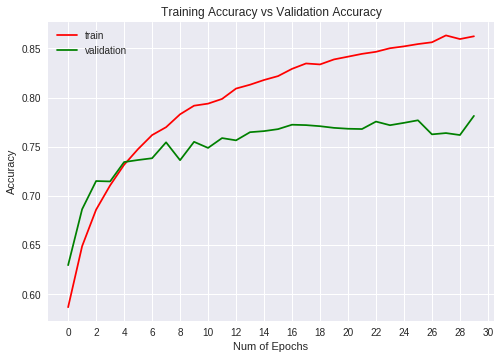

In [28]:
# Plots for training and testing process: loss and accuracy
from matplotlib import pyplot as plt
import numpy as np
plt.figure(0)
plt.plot(acc,'r')
plt.plot(val_acc,'g')
plt.xticks(np.arange(0, 31, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])


plt.show()

I do not think this would be much better if you trained it longer. As evidenced in the graph, the accuracy measures begin to plateau--especially the validation accuracy. This is suggestive of over-fitting, which means training more will not help.

### Problem 4.5

Suggest at least three different ways to improve the performance of the classifier defined in this Part. For each way, explain why that would help. This is an open-ended question, and answers may vary. Do _not_ implement your suggestions, and do _not_ refer to techniques we have not covered in class (such as batch normalization or other techniques you may have heard of).

If you suggest more than three ways, we will grade you for the best ones. However, we _will_ deduct points for patently wrong statements in any of your suggestions.

### Answer

1. Adding more convolutional layers in the architecture: the more layers there are, the more parameters the system can optimize for, which will make the model more flexible. The only drawbacks might be training time and overfitting--however, since our dataset is so large, we are less exposed to overfitting.

2. Change the allocation of validation and training samples. By increasing the number of training images you might be able to improve the accuracy. The drawback will be that you have a less trust-worthy validation to determine how generalizable the results are.

3. Increase the number of neurons in each convolutional layer. You can do that by increasing the number of filters in each layer. This will make the model more powerful and flexible to increase the accuracy.